Author : Beerappa Metre

Mail : beerappametre05@gmail.com

Project : Sentiment Analysis

Dataset: https://www.kaggle.com/datasets/tariqsays/sentiment-dataset-with-1-million-tweets

# Importing Libraries

In [11]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 153.3/153.3 kB 169.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

# Loading Dataset

In [13]:
df=pd.read_csv("dataset.csv")

In [14]:
df

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


# Text Pre-processing

In [15]:
df['Clean'] = df.apply(lambda row: row['Text'].lower(),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)

In [16]:
df.head()

,Text,Language,Label,Clean
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious,testimony is not evidence in a court of la...
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,como dos gotas de agua joven se disfraza de...
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious,flagstar bank discloses a data breach that im...
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda is set to host the headquarters of unit...
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious,oops i typed her name incorrectly today s br...


# Text Visualization

In [17]:
df['Label'].unique()

array(['litigious', 'negative', 'positive', 'uncertainty'], dtype=object)

(-0.5, 499.5, 299.5, -0.5)

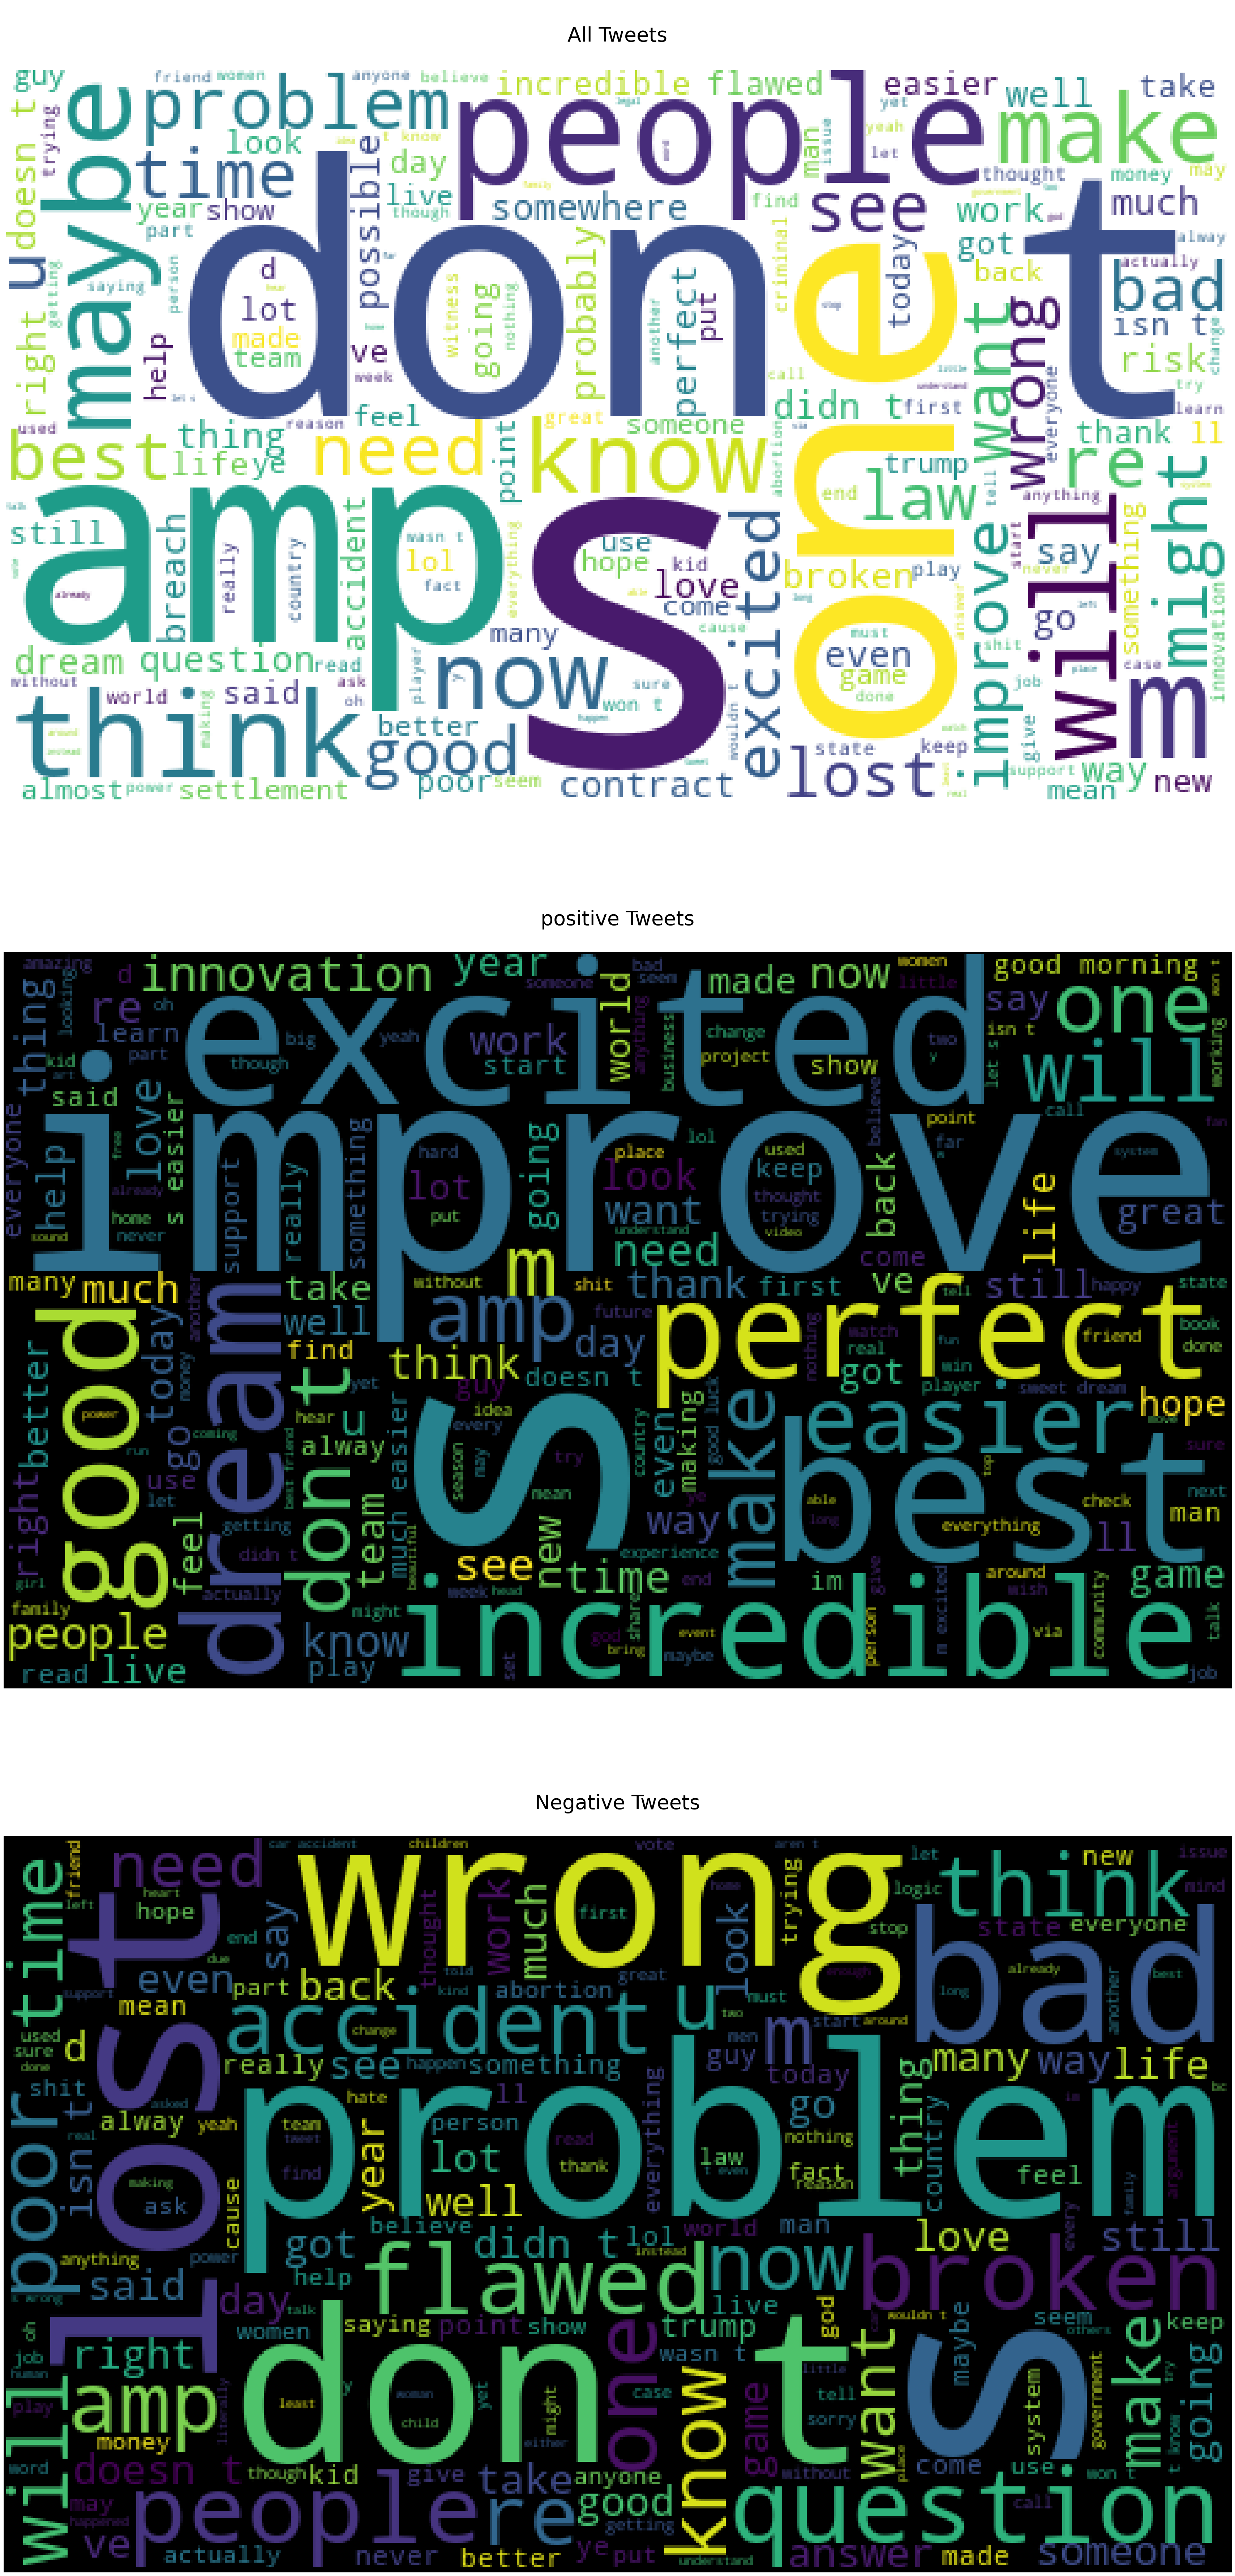

In [18]:
# Wordcloud

fig, ax = plt.subplots(3, 1, figsize  = (90,90))
firstcloud_all = WordCloud(
                          background_color='white',
                          width=500,
                          height=300
                         ).generate(" ".join(df['Clean']))
firstcloud_positive=WordCloud(
                          background_color='black',
                          width=500,
                          height=300
                         ).generate(" ".join(df[df['Label']=='positive']['Clean']))
firstcloud_negative=WordCloud(
                          background_color='black',
                          width=500,
                          height=300
                         ).generate(" ".join(df[df['Label']=='negative']['Clean']))

ax[0].imshow(firstcloud_all )
ax[0].set_title('\nAll Tweets\n', fontsize=40)
ax[0].axis('off')

ax[1].imshow(firstcloud_positive )
ax[1].set_title('\npositive Tweets\n', fontsize=40)
ax[1].axis('off')

ax[2].imshow(firstcloud_negative)
ax[2].set_title('\nNegative Tweets\n',fontsize=40)
ax[2].axis('off')

In [19]:
# labeling 

x = df["Clean"]
y = df["Label"]


# Vectorizer and Logistic Regression

In [20]:
model = Pipeline((("vect", TfidfVectorizer()),("clc", LogisticRegression(max_iter=600))))
xTrain = x.head(int(50000 * 0.9))
xTest =  x.tail(int(50000 * 0.1))
yTrain = y.head(int(50000*0.9))
yTest =  y.tail(int(50000 * 0.1))
model.fit(xTrain,yTrain)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

In [21]:
accuracy = (acc(model.predict(xTest), yTest))
print("Accuracy :- ", accuracy)
yPrediction = model.predict(xTest)

Accuracy :-  0.9558


In [22]:
print(model.predict(['you have a bad habbit of eating']))

['negative']


In [ ]:
print(model.predict(['you have a bad habbit of eating']))